# Análisis del problema
`Predecir la masa corporal de un paciente`
El objetivo de este proyecto es desarrollar un modelo de predicción para estimar el porcentaje de grasa corporal de una persona basado en un conjunto
de características físicas. A partir de los datos proporcionados en el dataset, que incluyen mediciones corporales como el peso, altura, perímetro del
cuello, abdomen, cadera, entre otros, buscamos identificar la relación entre estas variables y el porcentaje de grasa corporal.


# Entendimiento de los datos
`Density`(float64): Densidad corporal, indicador de masa sobre volumen del cuerpo.

`BodyFat`(float64): Porcentaje de grasa corporal, variable objetivo a predecir.

`Age`(int64): Edad de la persona en años.

`Weight` (float64): Peso en libras (lb).

`Height`(float64): Altura en pulgadas (in).

`Neck`(float64): Perímetro del cuello en centímetros (cm).

`Chest`(float64): Perímetro del pecho en centímetros (cm).

`Abdomen`(float64): Perímetro del abdomen en centímetros (cm), importante para la predicción de grasa corporal.

`Hip`(float64): Perímetro de la cadera en centímetros (cm).

`Thigh`(float64): Perímetro del muslo en centímetros (cm).

`Knee`(float64): Perímetro de la rodilla en centímetros (cm).

`Ankle`(float64): Perímetro del tobillo en centímetros (cm).

`Biceps`(float64): Perímetro del bíceps en centímetros (cm), medida del brazo relajado.

`Forearm`(float64): Perímetro del antebrazo en centímetros (cm).

`Wrist`(float64): Perímetro de la muñeca en centímetros (cm).

# Exploración de los datos

## Librerías

In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

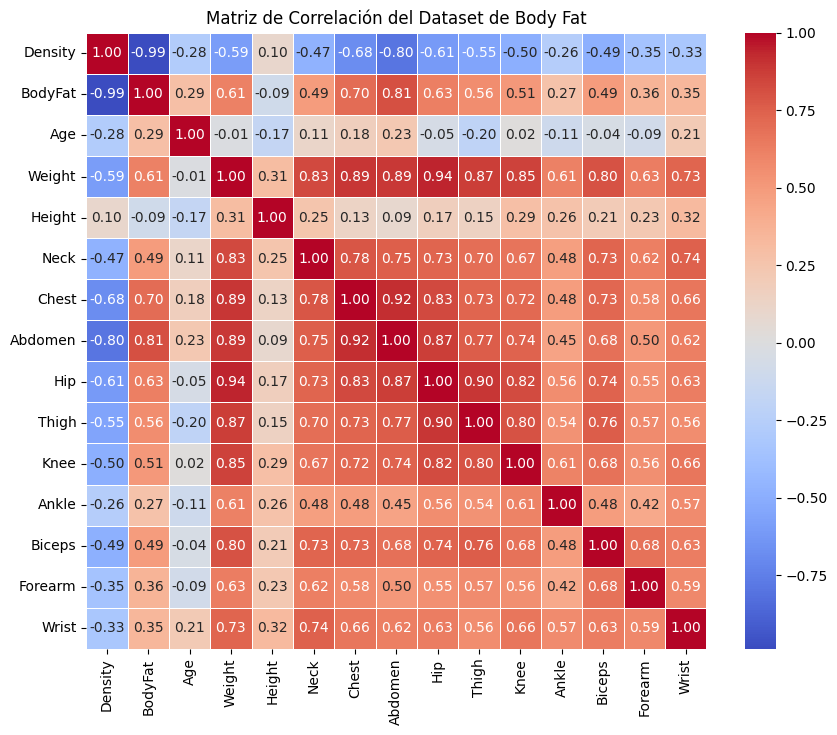

In [2]:

# Load the dataset
data = pd.read_csv('../datasets/bodyfat.csv')

correlation_matrix = data.corr(method='pearson')

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación del Dataset de Body Fat')
plt.show()

# Modelo Machine Learning

In [3]:
X = data.drop(columns=['BodyFat'])
y = data['BodyFat']
X = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ols_model = sm.OLS(y_train, X_train).fit()


# Evaluaciones

In [4]:
y_pred = ols_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²): {r2}")

Mean Squared Error (MSE): 0.38031220949045075
Mean Absolute Error (MAE): 0.4595308051401406
R-squared (R²): 0.9918244198499534


# Resultados

`Mean Squared Error (MSE)`: 0.3803122094846913

`Mean Absolute Error (MAE)`: 0.45953080513675293

`R-squared (R²)`: 0.9918244198500772

Este modelo OLS parece ser altamente preciso para predecir la grasa corporal, con muy bajos errores (MSE y MAE) y un R² cercano a 1. 
Esto sugiere que el modelo está capturando bien las relaciones entre las variables predictoras y 
el porcentaje de grasa corporal en el conjunto de pruebas.